<a href="https://colab.research.google.com/github/AbdulWahabRaza123/FYP_ML/blob/main/TrainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import densenet
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import cv2
import tensorflow as tf
import re
import pickle
from PIL import Image
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D, Concatenate, Flatten, Add, Dropout, GRU
import random
import datetime
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/FYP/NewDataSetTemp/Final_Train_Data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/FYP/NewDataSetTemp/Final_Test_Data.csv')
cv_data = pd.read_csv('/content/drive/MyDrive/FYP/NewDataSetTemp/Final_CV_Data.csv')

In [5]:
print('train data shape : ',train_data.shape)
train_data.head(2)

train data shape :  (2753, 4)


,Person_id,Image1,Image2,Report
0,1_IM-0001_0,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,startseq the cardiac silhouette and mediastinu...
1,2_IM-0652_0,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,startseq borderline cardiomegaly . midline st...


In [6]:
print('test data shape : ',test_data.shape)
test_data.head(2)

test data shape :  (386, 4)


,Person_id,Image1,Image2,Report
0,3575_IM-1757_0,3575_IM-1757-1001.dcm.png,3575_IM-1757-2001.dcm.png,startseq heart size normal . no pneumothora p...
1,3576_IM-1757_0,3576_IM-1757-1001.dcm.png,3576_IM-1757-2001.dcm.png,startseq the cardiomediastinal silhouette with...


In [7]:
print('CV data shape : ',cv_data.shape)
cv_data.head(2)

CV data shape :  (568, 4)


,Person_id,Image1,Image2,Report
0,3000_IM-1386-0001_0,3000_IM-1386-0001-0001.dcm.png,3000_IM-1386-0001-0002.dcm.png,startseq there are multiple bilateral pulmonar...
1,3001_IM-1387_0,3001_IM-1387-3001.dcm.png,3001_IM-1387-2001.dcm.png,startseq frontal and lateral views the chest s...


In [8]:
chexNet = densenet.DenseNet121(include_top=False, weights = None,   input_shape=(224,224,3), pooling="avg")
X = chexNet.output
X = Dense(14, activation="sigmoid", name="predictions")(X)
model = Model(inputs=chexNet.input, outputs=X)

In [9]:
# !gdown "https://drive.google.com/drive/u/0/my-drive"

In [ ]:
# ! gdown "https://openi.nlm.nih.gov/imgs/collections/NLMCXR_png.tgz"

In [ ]:
# import shutil
# shutil.unpack_archive("/content/NLMCXR_png.tgz","/content/NLMCXR_png")

In [10]:
# !gdown "https://drive.google.com/u/0/uc?id=19BllaOvs2x5PLV_vlWMy4i8LapLb2j6b&export=download"

In [11]:
#loadind pretrained weights for ChexNet model
model.load_weights('brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

In [12]:
chexNet = Model(inputs = model.input, outputs = model.layers[-2].output)

In [13]:
chexNet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

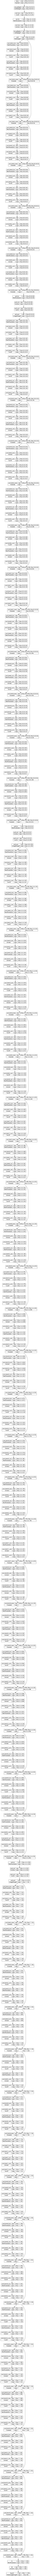

In [14]:
tf.keras.utils.plot_model(chexNet,show_shapes=True, dpi = 42)

In [15]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

(1, 224, 224, 3)


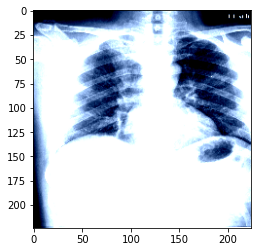

In [13]:
img = load_image('/content/drive/MyDrive/FYP/images/1000_IM-0003-1001.dcm.png')
print(img.shape)
plt.imshow(img[0])

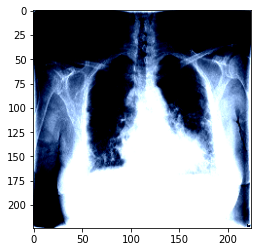

In [14]:
img = load_image('/content/drive/MyDrive/FYP/images/1001_IM-0004-1001.dcm.png')
plt.imshow(img[0])

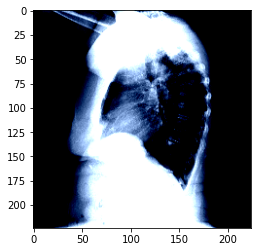

In [15]:
img = load_image('/content/drive/MyDrive/FYP/images/1004_IM-0005-2001.dcm.png')
plt.imshow(img[0])

In [26]:
# train_data.values

In [25]:
# img = load_image('/content/drive/MyDrive/FYP/images/1004_IM-0005-2001.dcm.png')
# chexNet.predict(img)

In [24]:
# Xnet_features = {}
# for key, img1, img2, finding in tqdm(train_data.values):
#     i1 = load_image("/content/drive/MyDrive/FYP/images/"+img1)
#     img1_features = chexNet.predict(i1)    
#     i2 = load_image("/content/drive/MyDrive/FYP/images/"+img2)
#     img2_features = chexNet.predict(i2)
#     input_ = np.concatenate((img1_features, img2_features), axis=1)
#     Xnet_features[key] = input_

# for key, img1, img2, finding in tqdm(test_data.values):
#     i1 = load_image("/content/drive/MyDrive/FYP/images/"+img1)
#     img1_features = chexNet.predict(i1)    
#     i2 = load_image("/content/drive/MyDrive/FYP/images/"+img2)
#     img2_features = chexNet.predict(i2)
#     input_ = np.concatenate((img1_features, img2_features), axis=1)
#     Xnet_features[key] = input_

# for key, img1, img2, finding in tqdm(cv_data.values):
#     i1 = load_image("/content/drive/MyDrive/FYP/images/"+img1)
#     img1_features = chexNet.predict(i1)    
#     i2 = load_image("/content/drive/MyDrive/FYP/images/"+img2)
#     img2_features = chexNet.predict(i2)
#     input_ = np.concatenate((img1_features, img2_features), axis=1)
#     Xnet_features[key] = input_

In [23]:
# Xnet_features

In [22]:
# Xnet_features["1_IM-0001_0"].shape

In [21]:
# Xnet_features["2_IM-0652_0"].shape

In [20]:
# Xnet_features["1_IM-0001_0"]

In [19]:
# train_data[:5]

In [17]:
# # save the file for future use
# f = open('Image_features_ecoder_decoder.pickle','wb')
# pickle.dump(Xnet_features, f)
# f.close()

In [18]:
with open("/content/drive/MyDrive/FYP/NewDataSetTemp/Image_features_ecoder_decoder.pickle", 'rb') as filehandle:
    Xnet_features = pickle.load(filehandle)

In [27]:
len(Xnet_features)

3707

In [28]:
train_data['Person_id'].head()

0    1_IM-0001_0
1    2_IM-0652_0
2    4_IM-2050_0
3    5_IM-2117_0
4    6_IM-2192_0
Name: Person_id, dtype: object

In [29]:
train_data['Report'].head()

0    startseq the cardiac silhouette and mediastinu...
1    startseq borderline cardiomegaly .  midline st...
2    startseq there are diffuse bilateral interstit...
3    startseq the cardiomediastinal silhouette and ...
4    startseq heart size and mediastinal contour ar...
Name: Report, dtype: object

In [30]:
# for encoder and decoder 
X_train = train_data['Person_id']
X_test = test_data['Person_id']
X_cv = cv_data['Person_id']
y_train = train_data['Report']
y_test =  test_data['Report']
y_cv =  cv_data['Report']

In [31]:
cheXnet_Features = Xnet_features

In [32]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(y_train.values)

In [33]:
y_train

0       startseq the cardiac silhouette and mediastinu...
1       startseq borderline cardiomegaly .  midline st...
2       startseq there are diffuse bilateral interstit...
3       startseq the cardiomediastinal silhouette and ...
4       startseq heart size and mediastinal contour ar...
                              ...                        
2748    startseq the lungs are clear without focal con...
2749    startseq the lungs are clear .  there no pleur...
2750    startseq lungs are clear without focal consoli...
2751    startseq the lungs are clear bilaterally .  sp...
2752    startseq the cardiac silhouette the upper limi...
Name: Report, Length: 2753, dtype: object

In [34]:
pading_size = 153   # Max length

In [35]:
tokenizer.word_index.keys()

dict_keys(['.', 'the', 'no', 'are', 'normal', 'startseq', 'endseq', 'and', 'there', 'pleural', 'pneumothora', 'effusion', 'heart', 'lungs', 'size', 'focal', 'within', 'limits', 'clear', 'pulmonary', 'consolidation', 'silhouette', 'right', 'mediastinal', 'airspace', 'cardiomediastinal', 'left', 'lung', 'acute', 'with', 'disease', 'stable', 'unremarkable', 'mediastinum', 'spine', 'changes', 'thoracic', 'structures', 'contours', 'bony', 'contour', 'degenerative', 'mild', 'large', 'seen', 'without', 'cardiac', 'calcified', 'opacity', 'appear', 'osseous', 'effusions', 'vascularity', 'for', 'abnormality', 'upper', 'intact', 'evidence', 'opacities', 'visualized', 'lateral', 'chest', 'vasculature', 'lobe', 'noted', 'identified', 'aorta', 'air', 'bilaterally', 'volumes', 'lower', 'findings', 'atelectasis', 'present', 'infiltrate', 'low', 'edema', 'prior', 'grossly', 'space', 'free', 'unchanged', 'granuloma', 'enlarged', 'bilateral', 'rib', 'base', 'scarring', 'pneumothoraces', 'appearance', 'sm

In [36]:
vocab_size = len(tokenizer.word_index.keys()) + 1

In [35]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [34]:
# !unzip glove*.zip

In [33]:
# !wget http://evexdb.org/pmresources/ngrams/PMC/2-grams-2013.tsv.gz

In [36]:
# !wget https://archive.org/download/pubmed2018_w2v_200D.tar/pubmed2018_w2v_200D.tar.gz

In [37]:
# with open("/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D.tar","rb") as f:
#     data = f.read()

In [37]:
# import  tarfile
# tar = tarfile.open("/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D.tar")
# tar.getmembers()

In [38]:
# index = tar.getnames()
# index

In [39]:
# import pprint
# pprint.pprint(index)

In [40]:
# import tarfile
  
# # # open file
# file = tarfile.open('/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D.tar')
  
# # extracting file
# file.extractall('/content/drive/MyDrive/FYP/NewDataSetTemp')
  
# file.close()

In [43]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D/pubmed2018_w2v_200D.bin', binary=True)
word_vectors.most_similar(positive=['chest'])

[('thorax', 0.7323712110519409),
 ('cxr', 0.7277155518531799),
 ('roentgenogram', 0.7160742878913879),
 ('abdomen', 0.7072001099586487),
 ('chestabdominal', 0.6981319189071655),
 ('cardiologist-based', 0.68648761510849),
 ('nonpleuritic', 0.6838732361793518),
 ('cardiac-sounding', 0.6832288503646851),
 ('chest-wall', 0.6831706762313843),
 ('abdominal', 0.6801201105117798)]

In [47]:
word_vectors.wv.vocab

{'the': <gensim.models.keyedvectors.Vocab at 0x7f7d586a53d0>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f7d50276c10>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f7d50276cd0>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f7d50276d30>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7f7d50276dc0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f7d50276e50>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f7d50276ee0>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7f7d50276f40>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7f7d50276fd0>,
 'were': <gensim.models.keyedvectors.Vocab at 0x7f7d50276df0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f7d506de130>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7f7d506de0d0>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7f7d5048a040>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7f7d5048a0a0>,
 'patients': <gensim.models.keyedvectors.Vocab at 0x7f7d5048a130>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7f7d5048a190>,
 'from': 

In [50]:
dir(word_vectors)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 'accuracy',
 'add',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'get_keras_embedding',
 'get_vector',
 'index2entity',
 'index2word',
 'init_sims',
 'load',
 'load_word2vec_format',
 'log_accuracy',
 'log_evaluate_word_pairs',
 'most_similar',
 'most_similar_cosmul',
 'most_similar_to_given',
 'n_similarity',
 'rank',
 'save',
 'save_word2vec_format',
 'similar_by_vector',
 's

In [60]:
word_vectors["liver"]

array([-2.21770734e-01,  2.62318552e-01, -5.04270419e-02,  2.69089550e-01,
       -1.97852641e-01, -3.18579227e-01, -1.31575599e-01, -2.00949773e-01,
       -4.38630462e-01,  1.47681132e-01, -3.89750302e-01,  9.38694328e-02,
        3.88668478e-03,  1.67195141e-01,  8.92909840e-02,  3.26934725e-01,
        8.56749639e-02,  3.73444855e-01,  8.02400988e-03, -2.40975976e-01,
        1.71839491e-01, -4.75808047e-02,  4.13731337e-01, -5.32442749e-01,
       -3.27275276e-01,  7.75770517e-03, -8.56515050e-01,  4.51354891e-01,
       -2.45703205e-01, -3.76508832e-02,  2.05021307e-01, -3.01774681e-01,
        1.82852104e-01, -1.70533121e-01, -1.69194520e-01, -2.81952292e-01,
        3.32571939e-02,  1.46966368e-01, -6.42983243e-02, -5.78786254e-01,
        4.91155922e-01,  3.13045681e-01, -4.36221808e-02,  3.17550331e-01,
       -2.96362918e-02,  3.47656980e-02,  4.70910698e-01, -4.06850539e-02,
       -6.82807937e-02, -1.52347879e-02, -1.36532888e-01, -1.78944603e-01,
       -2.40460724e-01, -

In [49]:
# from gensim.models import KeyedVectors
# word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D.tar', binary=True)
# word_vectors.most_similar(positive=['chest'])

In [79]:
embedding_matrix = np.zeros((vocab_size,200))
for word, i in tokenizer.word_index.items():
    if word in word_vectors.wv.vocab:
        vec = word_vectors[word]
        embedding_matrix[i] = vec
    else:
        continue

In [80]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.05830206,  0.02987006,  0.0442073 , ..., -0.13333912,
         0.14151359, -0.0332308 ],
       ...,
       [-0.05448178, -0.05567867,  0.23111549, ...,  0.21211803,
        -0.03142425, -0.12455647],
       [ 0.36152577,  0.17869602, -0.29757953, ...,  0.0975585 ,
        -0.09977522, -0.36417055],
       [-0.1754463 ,  0.02341145,  0.16157323, ..., -0.04975232,
        -0.13884829,  0.09868696]])

In [1]:
# !pip install sh

In [ ]:
# import gzip
# # with gzip.open('/content/2-grams-2013.tsv.gz') as f:
# with gzip.open('/content/2-grams-2013.tsv.gz', 'rb') as f:
#   vector = pd.read_csv(f)
# from sh import gunzip

# gunzip('/content/pubmed2018_w2v_200D.tar.gz')
    

''

In [ ]:
# f = open('/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D.tar') 
# # bioMed = pickle.load(f)
# print(f)
# for line in f:
#   print(line)
# f.close()

In [64]:
# f = open('/content/drive/MyDrive/FYP/NewDataSetTemp/glove_vectors', encoding='utf-8')
# for line in f:
#   values = line.split()
#   word = values[1:]
#   print("This is line ",word)
# f.close()

In [65]:
# f = open('/content/drive/MyDrive/FYP/2-grams-2013.tsv', encoding='utf-8')
# for line in f:
#   print("This is line ",line)

In [66]:
# embedding_matrix = np.zeros((vocab_size,300))
# for word, i in tokenizer.word_index.items():
#     if word in glove_vectors.keys():
#         vec = glove_vectors[word]
#         embedding_matrix[i] = vec
#     else:
#         continue

In [67]:
# print('Indexing word vectors.')

# embeddings_index = {}
# f = open('/content/drive/MyDrive/FYP/2-grams-2013.tsv', encoding='utf-8')
# for line in f:
#     values = line.split()
#     word = values[0]
#     print("This is value ",word)
#     coefs = np.asarray(values, dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
# import pickle
# pickle.dump({'embeddings_index' : embeddings_index } , open('/content/drive/MyDrive/FYP/NewDataSetTemp/glove_vectors', 'wb'))

In [68]:
# import shutil
# shutil.unpack_archive("/content/2-grams-2013.tsv.gz","/content/2-grams-2013.tsv")

In [69]:
# f = open('/content/drive/MyDrive/FYP/NewDataSetTemp/glove_vectors','rb') # 300d glove vectors  
# glove_vectors = pickle.load(f)
# f.close()

In [70]:
# glove_vectors

In [71]:
# glove_vectors['embeddings_index'].keys()

In [72]:
# !wget http://evexdb.org/pmresources/ngrams/PMC/filelist
# !for url in `cat filelist` ; do wget -c $url ; done

In [73]:
# !for url in `cat filelist | grep 2-grams` ; do wget -c $url ; done

In [74]:
# !wget -c http://evexdb.org/pmresources/ngrams/PMC/2-grams-2013.tsv.gz

In [76]:
# embedding_matrix = np.zeros((vocab_size,300))
# for word, i in tokenizer.word_index.items():
#     # print("This is word ",word)
#     if word in glove_vectors.keys():
#         print(f"This is vector for ",word)
#         vec = glove_vectors[word]
#         print(f"This is vector for ",word)
#         embedding_matrix[i] = vec
#     else:
#         continue

In [82]:
embedding_matrix[20]

array([ 0.09611087,  0.09195895,  0.03822519,  0.34407347, -0.48066923,
       -0.07276012, -0.00901614, -0.30737165,  0.07330379, -0.05253128,
        0.12242238,  0.29920462,  0.3188014 ,  0.54708153, -0.03146622,
        0.58465278,  0.31447619, -0.17126779, -0.06888431,  0.5657565 ,
       -0.07486048, -0.03930221,  0.23348585, -0.5595426 , -0.52007598,
       -0.4136312 , -0.37738568,  0.12511431, -0.16838455, -0.25776908,
       -0.00916488, -0.24004099, -0.29868463, -0.36483723, -0.25615734,
       -0.02183086,  0.86074871, -0.17927878,  0.03484649, -0.05637256,
       -0.12599631,  0.23279771,  0.13392724,  0.2226353 , -0.12095227,
       -0.26296747,  0.49100912,  0.0069702 , -0.01749307,  0.04365034,
       -0.31826338, -0.25583041, -0.55393308, -0.34754631,  0.0732787 ,
        0.00701253, -0.18624938,  0.35134625, -0.1102367 ,  0.36999527,
       -0.1007122 ,  0.09780332,  0.2667565 , -0.30990872,  0.06594697,
       -0.40391681,  0.16892795,  0.13071157, -0.09247416,  0.20

In [83]:
BATCH_SIZE = 12

In [84]:
def load_image(id_, report):
    '''Loads the Image Features with their corresponding Ids'''
    img_feature = cheXnet_Features[id_.decode('utf-8')][0]
    return img_feature, report

In [85]:
def dataset_generator(img_name, caption):
  
    dataset = tf.data.Dataset.from_tensor_slices((img_name, caption))

  # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_image, [item1, item2], [tf.float32, tf.string]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # Shuffle and batch
    dataset = dataset.shuffle(500).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [86]:
train_generator = dataset_generator(X_train, y_train)
cv_generator = dataset_generator(X_cv, y_cv)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [87]:
def bytes_to_string(arr):
    '''The generator gives provides data in bytes. This function converts them back to strings for manipulation'''
    for i in range(len(arr)):
        arr[i] = arr[i].decode('utf-8')
    return arr

In [88]:
def convert(images, reports):
    '''This function takes the batch of data and converts them into a new dataset'''
    imgs = []
    in_reports = []
    out_reports = []
    for i in range(len(images)):
        sequence = [tokenizer.word_index[e] for e in reports[i].split() if e in tokenizer.word_index.keys()]
      #  print(sequence)
        for j in range(1,len(sequence)):

            in_seq = sequence[:j]
            out_seq = sequence[j]
            out_seq = tf.keras.utils.to_categorical(out_seq, num_classes=vocab_size)

            imgs.append(images[i])
          #  print(in_seq)
            in_reports.append(in_seq)
           # print(out_seq)
            out_reports.append(out_seq)
        
    return np.array(imgs), np.array(in_reports), np.array(out_reports)

In [90]:
input1 = Input(shape=(2048), name='Image_input')
dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')(input1)

input2 = Input(shape=(153), name='Text_Input')
embedding_layer = Embedding(input_dim = vocab_size, output_dim = 200, input_length=153, mask_zero=True, trainable=False, 
                weights=[embedding_matrix], name="Embedding_layer")
emb = embedding_layer(input2)

LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1")(emb)
#LSTM1_output = LSTM1(emb)

LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), name="LSTM2")
LSTM2_output = LSTM2(LSTM1)

dropout1 = Dropout(0.5, name='dropout1')(LSTM2_output)

dec =  tf.keras.layers.Add()([dense1, dropout1])

fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='fc1')
fc1_output = fc1(dec)
dropout2 = Dropout(0.4, name='dropout2')(fc1_output)
output_layer = Dense(vocab_size, activation='softmax', name='Output_layer')
output = output_layer(dropout2)

encoder_decoder = Model(inputs = [input1, input2], outputs = output)
encoder_decoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Text_Input (InputLayer)        [(None, 153)]        0           []                               
                                                                                                  
 Embedding_layer (Embedding)    (None, 153, 200)     291600      ['Text_Input[0][0]']             
                                                                                                  
 LSTM1 (LSTM)                   (None, 153, 256)     467968      ['Embedding_layer[0][0]']        
                                                                                                  
 Image_input (InputLayer)       [(None, 2048)]       0           []                               
                                                                                            

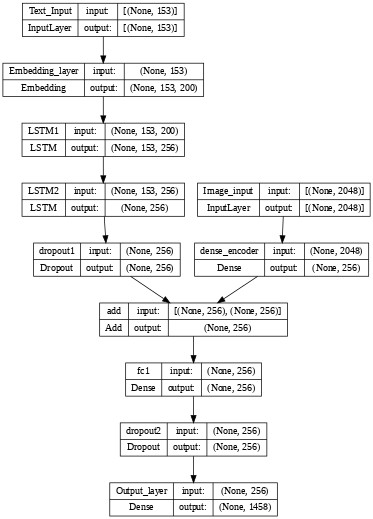

In [91]:
tf.keras.utils.plot_model(encoder_decoder,show_shapes=True, dpi = 52)

In [92]:
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=False, reduction='auto')

def maskedLoss(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))
    
    #calculating the loss
    loss_ = loss_function(y_true, y_pred)
    
    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)
    
    #applying the mask to loss
    loss_ = loss_*mask
    
    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_

In [93]:
optimizer = tf.keras.optimizers.Adam(0.001)
encoder_decoder.compile(optimizer, loss = maskedLoss)

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/train'
val_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
val_summary_writer = tf.summary.create_file_writer(val_log_dir)

In [94]:
for img, report in cv_generator:
   print(img)

tf.Tensor(
[[6.0882641e-04 1.7334144e-03 2.2304000e-03 ... 8.5766429e-01
  8.1525785e-01 6.9999850e-01]
 [4.2169911e-04 1.6454803e-03 1.4440813e-03 ... 7.4534839e-01
  8.4475154e-01 6.0836923e-01]
 [2.0505028e-04 2.0395524e-03 1.8576949e-03 ... 8.6421359e-01
  8.8650370e-01 7.0435363e-01]
 ...
 [1.1790786e-05 1.2457342e-03 8.8504702e-04 ... 7.7981085e-01
  8.3537394e-01 6.4160216e-01]
 [2.6466075e-04 2.0091671e-03 1.4523744e-03 ... 8.4154761e-01
  8.4718555e-01 6.9467694e-01]
 [0.0000000e+00 1.3166647e-03 2.3971070e-03 ... 8.8607508e-01
  8.5081178e-01 7.1787333e-01]], shape=(12, 2048), dtype=float32)
tf.Tensor(
[[3.9470481e-04 1.1796101e-03 2.5812082e-03 ... 9.2890936e-01
  8.8720697e-01 7.5713116e-01]
 [3.6412862e-04 1.6725711e-03 2.2071761e-03 ... 8.5583138e-01
  8.3943158e-01 6.9757330e-01]
 [3.0079618e-04 1.9910391e-03 1.9272162e-03 ... 8.4048074e-01
  8.2946897e-01 6.8950015e-01]
 ...
 [3.5969139e-04 1.1923476e-03 2.7225059e-03 ... 7.7085924e-01
  8.5383612e-01 6.3206494e-01]
 [4

In [95]:
#training for 20 epochs
epoch_train_loss = []
epoch_val_loss = []

for epoch in range(20):
    print('EPOCH : ',epoch+1)
    start = time.time()
    batch_loss_tr = 0
    batch_loss_vl = 0
    
    for img, report in train_generator:
       
        r1 = bytes_to_string(report.numpy())
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
        results = encoder_decoder.train_on_batch([img_input, rep_input], output_word)
        
        batch_loss_tr += results

    train_loss = batch_loss_tr/(X_train.shape[0]//14)
 #   print('Saving Tensorboard')
    with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss, step = epoch)
    
    for img, report in cv_generator:
        
        r1 = bytes_to_string(report.numpy())
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
        results = encoder_decoder.test_on_batch([img_input, rep_input], output_word)
        batch_loss_vl += results
    
    val_loss = batch_loss_vl/(X_cv.shape[0]//14)
    
    with val_summary_writer.as_default():
        tf.summary.scalar('loss', val_loss, step = epoch)

    epoch_train_loss.append(train_loss)

    epoch_val_loss.append(val_loss)
    
    print('Training Loss: {},  Val Loss: {}'.format(train_loss, val_loss))
    print('Time Taken for this Epoch : {} sec'.format(time.time()-start))   
    encoder_decoder.save_weights('encoder_decoder_epoch_'+ str(epoch+1) + '.h5')
    print('--------------------------------------------------------------------------------------------')

EPOCH :  1
Training Loss: 0.0038504126975883028,  Val Loss: 0.0034288058173842727
Time Taken for this Epoch : 41.910024642944336 sec
--------------------------------------------------------------------------------------------
EPOCH :  2
Training Loss: 0.0032619808180428737,  Val Loss: 0.002750271145487204
Time Taken for this Epoch : 14.77794861793518 sec
--------------------------------------------------------------------------------------------
EPOCH :  3
Training Loss: 0.002621234250278687,  Val Loss: 0.002138625681982376
Time Taken for this Epoch : 15.111456155776978 sec
--------------------------------------------------------------------------------------------
EPOCH :  4
Training Loss: 0.002225481978693635,  Val Loss: 0.0019140844757203012
Time Taken for this Epoch : 15.84793472290039 sec
--------------------------------------------------------------------------------------------
EPOCH :  5
Training Loss: 0.0020101739673362095,  Val Loss: 0.0017467547077103518
Time Taken for this 

Text(0.5, 1.0, 'Loss per epoch')

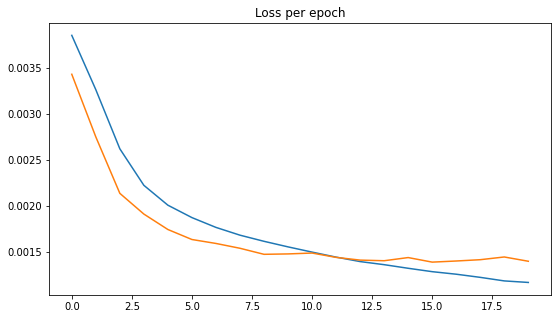

In [96]:
plt.figure(figsize=(9,5))

plt.plot(epoch_train_loss)
plt.plot(epoch_val_loss)

plt.title('Loss per epoch')

In [97]:
encoder_decoder.load_weights("/content/encoder_decoder_epoch_5.h5")

In [98]:
# encoder
encoder_input = encoder_decoder.input[0]
encoder_output = encoder_decoder.get_layer('dense_encoder').output
encoder_model = Model(encoder_input, encoder_output)

# decoder# 
text_input = encoder_decoder.input[1]
enc_output = Input(shape=(256,), name='Enc_Output')
text_output = encoder_decoder.get_layer('LSTM2').output
add1 = tf.keras.layers.Add()([text_output, enc_output])
fc_1 = fc1(add1)
decoder_output = output_layer(fc_1)

decoder_model = Model(inputs = [text_input, enc_output], outputs = decoder_output)

In [99]:
def greedysearch(img):
    image = cheXnet_Features[img]
    input_ = 'startseq'
    image_features = encoder_model.predict(image)
    
    result = []
    for i in range(153):
        input_tok = [tokenizer.word_index[w] for w in input_.split()]
        input_padded = pad_sequences([input_tok], 153, padding='post')
        predictions = decoder_model.predict([input_padded, image_features])
        arg = np.argmax(predictions)
        if arg != 7:   # endseq
            result.append(tokenizer.index_word[arg])
            input_ = input_ + ' ' + tokenizer.index_word[arg]
        else:
            break
    rep = ' '.join(e for e in result)
    return rep

In [100]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

In [101]:
def get_result(idx=0):
  
  plt.figure(figsize=(9,5))

  pre_Report = greedysearch(cv_data['Person_id'][idx]) # result after 20 epochs
  print('------------------------------------------------------------------------------------------------------')
  print("Predicted Report : ",pre_Report)
  print('------------------------------------------------------------------------------------------------------')
  print("Actual Report : ",cv_data['Report'][idx])

  plt.subplot(121)
  img = load_image("/content/drive/MyDrive/FYP/images/"+cv_data['Image1'][idx])
  plt.imshow(img[0])

  plt.subplot(122)
  img = load_image("/content/drive/MyDrive/FYP/images/"+cv_data['Image2'][idx])
  plt.imshow(img[0])

1/1 [==============================] - 0s 22ms/step
------------------------------------------------------------------------------------------------------
Predicted Report :  the heart normal size . the mediastinum unremarkable . the lungs are clear .
------------------------------------------------------------------------------------------------------
Actual Report :  startseq no focal consolidation pneumothora pleural effusions .  stable calcified granulomas .  cardiomediastinal silhouette demonstrates mild tortuosity the thoracic aorta and atherosclerotic calcifications the aortic no acute osseous abnormality identified .  endseq


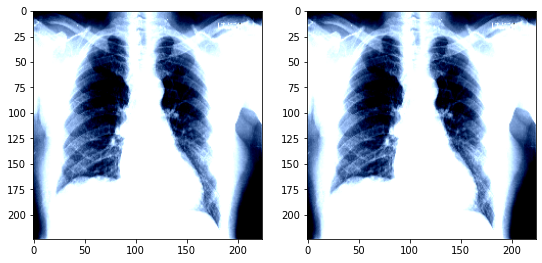

In [102]:
get_result(3)
# cv_data['Person_id'][0]